In [1]:
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 24.4 MB/s 
     |████████████████████████████████| 9.9 MB 64.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
df = pd.read_csv("BAJAJFINSV.csv")
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


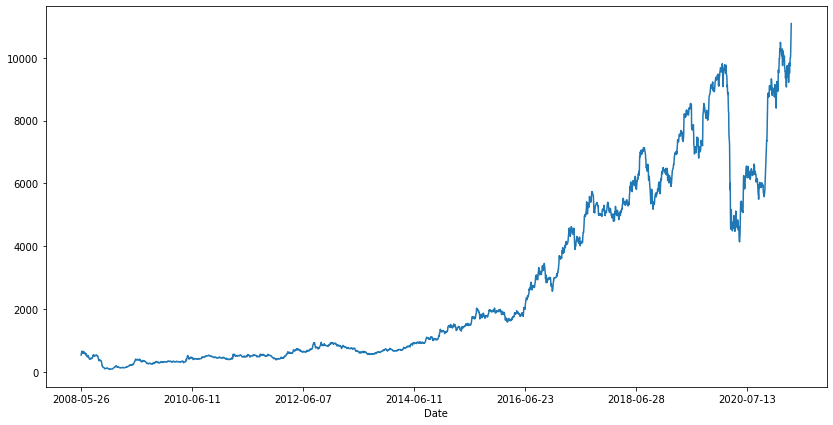

In [3]:
# Volume Weighted Average Price
df.VWAP.plot(figsize=(14, 7))

In [4]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888,5,22,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558,5,22,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689,5,22,28,2
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225,5,22,29,3
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514,5,22,30,4


In [5]:
import numpy as np
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,...,9.306703e+13,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,...,1.726368e+14,3.202323e+13,4.039685e+13,5.419115e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,...,2.107369e+14,5.388164e+13,5.388164e+13,5.388164e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,...,2.350756e+14,5.682195e+13,5.682195e+13,5.682195e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,...,2.508797e+14,2.541759e+13,5.613884e+13,5.613884e+13,20805.792969,20746.582031,20480.119141,6680.793945,8337.476562,10924.103516


In [6]:
exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

# exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3"]

all_feats = exogenous_features
all_feats.insert(0, 'VWAP')
# all_feats.insert(0, 'Date')
exogenous_features[0]

'VWAP'

In [7]:
df1 = df[all_feats]
# df1.reset_index(inplace = True)
df1.head()

,VWAP,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,Volume_mean_lag3,Volume_std_lag3,Turnover_mean_lag3,Turnover_std_lag3,Trades_mean_lag3,...,Volume_mean_lag30,Volume_std_lag30,Turnover_mean_lag30,Turnover_std_lag30,Trades_mean_lag30,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,548.85,2797.715820,36.591541,2711.090820,38.577595,2.319186e+05,105226.460938,9.462337e+13,3.202323e+13,20805.792969,...,2.417277e+05,199778.59375,9.306703e+13,5.419115e+13,20480.119141,10924.103516,5,22,26,0
2008-05-27,572.15,619.000000,36.591541,501.000000,38.577595,3.145446e+06,105226.460938,1.726368e+14,3.202323e+13,20805.792969,...,3.145446e+06,199778.59375,1.726368e+14,5.419115e+13,20480.119141,10924.103516,5,22,27,1
2008-05-28,618.37,614.974976,5.692210,496.049988,7.000357,3.747295e+06,851143.000000,2.107369e+14,5.388164e+13,20805.792969,...,3.747295e+06,851143.00000,2.107369e+14,5.388164e+13,20480.119141,10924.103516,5,22,28,2
2008-05-29,659.60,631.849976,29.504194,518.700012,39.542004,4.027783e+06,773461.562500,2.350756e+14,5.682195e+13,20805.792969,...,4.027783e+06,773461.56250,2.350756e+14,5.682195e+13,20480.119141,10924.103516,5,22,29,3
2008-05-30,636.41,659.849976,46.293602,554.366638,59.042385,4.486735e+06,123703.664062,2.769607e+14,2.541759e+13,20805.792969,...,4.151413e+06,678207.75000,2.508797e+14,5.613884e+13,20480.119141,10924.103516,5,22,30,4


In [8]:
# df_train = df1[df1.Date < "2021"]
# df_valid = df1[df1.Date >= "2021"]

df_train = df1[:int(0.98*(len(df1)))]
df_valid = df1[int(0.98*(len(df1))):]

In [9]:
df_valid.tail()

,VWAP,High_mean_lag3,High_std_lag3,Low_mean_lag3,Low_std_lag3,Volume_mean_lag3,Volume_std_lag3,Turnover_mean_lag3,Turnover_std_lag3,Trades_mean_lag3,...,Volume_mean_lag30,Volume_std_lag30,Turnover_mean_lag30,Turnover_std_lag30,Trades_mean_lag30,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-26,9995.72,9999.933594,124.518288,9650.000000,78.102493,6.696557e+05,114106.437500,6.591550e+14,1.125016e+14,81834.335938,...,449171.53125,164492.578125,4.315914e+14,1.583965e+14,57552.734375,23079.115234,4,17,26,0
2021-04-27,10036.76,10059.766602,128.351486,9750.733398,146.395401,5.432770e+05,109533.078125,5.373954e+14,1.061869e+14,66767.664062,...,454357.84375,160866.015625,4.368517e+14,1.551437e+14,57976.167969,22715.582031,4,17,27,1
2021-04-28,10445.96,10133.466797,8.709382,9868.966797,115.977859,4.634893e+05,147568.937500,4.629427e+14,1.455642e+14,52578.332031,...,455579.03125,159838.375000,4.381481e+14,1.541653e+14,58140.234375,22564.861328,4,17,28,2
2021-04-29,10980.40,10291.316406,281.169159,10006.016602,129.515732,6.254413e+05,424738.250000,6.423597e+14,4.529368e+14,70627.000000,...,484554.00000,195163.703125,4.687746e+14,1.991290e+14,61189.300781,25324.980469,4,17,29,3
2021-04-30,11081.78,10682.983398,586.380737,10211.950195,282.598663,1.051075e+06,679007.500000,1.123495e+15,7.601496e+14,110731.000000,...,525959.00000,294843.125000,5.156475e+14,3.230900e+14,64880.433594,31630.083984,4,17,30,4


In [13]:
import pmdarima as pm

model = pm.auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], stationary = True, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
forecast.index = df_valid.index
# model = pm.auto_arima(df_train.VWAP, trace=True, error_action="ignore", suppress_warnings=True)
# model.fit(df_train.VWAP)
# forecast = model.predict(n_periods=len(df_valid))

df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=35599.133, Time=9.52 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=58496.065, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=60551.407, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=35625.567, Time=4.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=35626.785, Time=4.47 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=35590.029, Time=5.97 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=35612.672, Time=5.39 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=35630.278, Time=6.93 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=35583.418, Time=6.76 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=35590.218, Time=4.55 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=35625.751, Time=7.70 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=35579.876, Time=8.94 sec
 ARIMA(2,0,4)(0,0,0)[0] interce

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [14]:
df_valid[['VWAP', 'Forecast_ARIMAX']].head(20)

,VWAP,Forecast_ARIMAX
Date,,
2021-01-22,9086.37,9328.143525
2021-01-25,9216.03,9321.645913
2021-01-27,9160.23,9346.456831
2021-01-28,9000.96,9352.723970
2021-01-29,8932.07,9374.265737
2021-02-01,9296.79,9378.421814
2021-02-02,9613.89,9397.092296
2021-02-03,9512.18,9399.455112
2021-02-04,9643.02,9415.601435


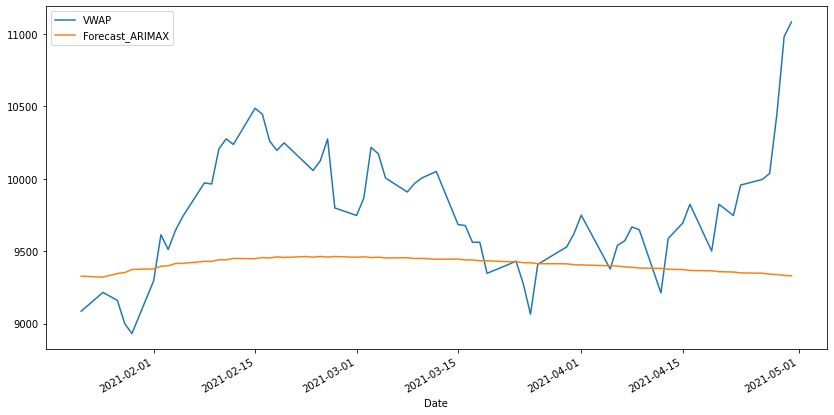

In [15]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))